In [2]:
# importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [3]:
# open data and remove unnecesasry columns
df = pd.read_csv('/Users/SnehPandya/Desktop/DeepLearningAGN/data/tau_fulldata_matched.csv',index_col = 0)
df.head()
df = df.rename(columns = {'z':'z_ground_truth'})
df = df.drop(columns = ['ID','RA','DEC','tau','tau_lim_lo','tau_lim_hi','M_tau','ERR'])
df.head()

,Mass_ground_truth,z_ground_truth
0,7.523331,1.0730
1,8.817950,0.7867
2,8.921718,1.6199
3,9.022211,0.6125
4,9.249395,2.7563


In [4]:
# convert to numpy array
array = df.to_numpy()
array

array([[ 7.52333061,  1.073     ],
       [ 8.81795034,  0.7867    ],
       [ 8.92171817,  1.6199    ],
       ..., 
       [ 8.45017379,  1.801     ],
       [ 8.02155865,  0.987     ],
       [ 8.98848251,  1.409     ]])

In [5]:
# isolate attributes and targets
z_array = array[:,1].reshape(-1,1)
m_array = array[:,0]
print(z_array)
print(m_array)

[[ 1.073 ]
 [ 0.7867]
 [ 1.6199]
 ..., 
 [ 1.801 ]
 [ 0.987 ]
 [ 1.409 ]]
[ 7.52333061  8.81795034  8.92171817 ...,  8.45017379  8.02155865
  8.98848251]


In [6]:
#split train and test set (X -> redshift, y -> mass)
X_train, X_test, y_train, y_test = train_test_split(z_array, m_array, test_size=0.2, random_state=1)

In [7]:
#define regression and train it
regressor = LinearRegression()
regressor.fit(X_train,y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# retrieve line of best fit attributes
print(regressor.intercept_) # y intercept (b)
print(regressor.coef_) # slope (m)
print(regressor.score(X_test,y_test)) #(r^2 score)

8.38322411283
[ 0.30706095]
0.218405182856


In [10]:
# apply regression on test set 
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)
# Y = .307*X + 8.383

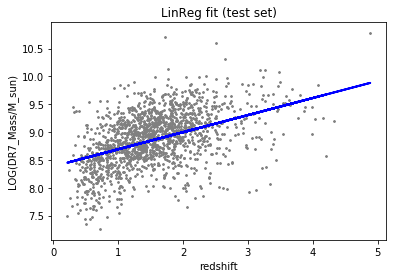

In [11]:
# plotting 
plt.scatter(X_test, y_test,  color='gray',s=2)
plt.plot(X_test, y_pred_test, color='blue', linewidth=2)
plt.xlabel('redshift')
plt.ylabel('LOG(DR7_Mass/M_sun)')
plt.title('LinReg fit (test set)')
plt.show()

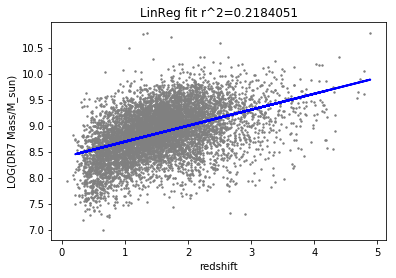

In [13]:
plt.scatter(X_train, y_train,  color='gray',s=2)
plt.scatter(X_test, y_test, color = 'gray', s=2)
plt.plot(X_test, y_pred_test, color='blue', linewidth=2)
plt.xlabel('redshift')
plt.ylabel('LOG(DR7 Mass/M_sun)')
plt.title('LinReg fit r^2=' + str(regressor.score(X_test,y_test))[0:9])
plt.show()

In [14]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Root Mean Squared Error: 0.42880194602
